# Predicting Employee Attrition
### 2020/11/30 KAIST 배유로 (eurobae@kaist.ac.kr)

IBM 데이터 과학자들이 만든 가상의 HR 데이터셋입니다.

1,470명에 대한 35개의 변수가 기록되어 있고, 종속변수는 <b>Attrition</b>, 즉 0 또는 1의 퇴사 여부입니다.

Data Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [1]:
# !pip install plotly

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import pandas as pd

pd.options.display.max_columns = None
py.init_notebook_mode(connected=True)

/Users/hmkim/.pyenv/versions/MLproject_HR/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.drop(columns=["EmployeeNumber","EmployeeCount","Over18","StandardHours"], inplace=True) # unnecessary columns
data = data[["Attrition"] + [c for c in data.columns if c != "Attrition"]] # change the order
data

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,No,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


## 1. Exploratory Data Analysis

In [3]:
data.isnull().any()

Attrition                   False
Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [4]:
data.Attrition = data.Attrition.apply(lambda x: 1 if x == "Yes" else 0)

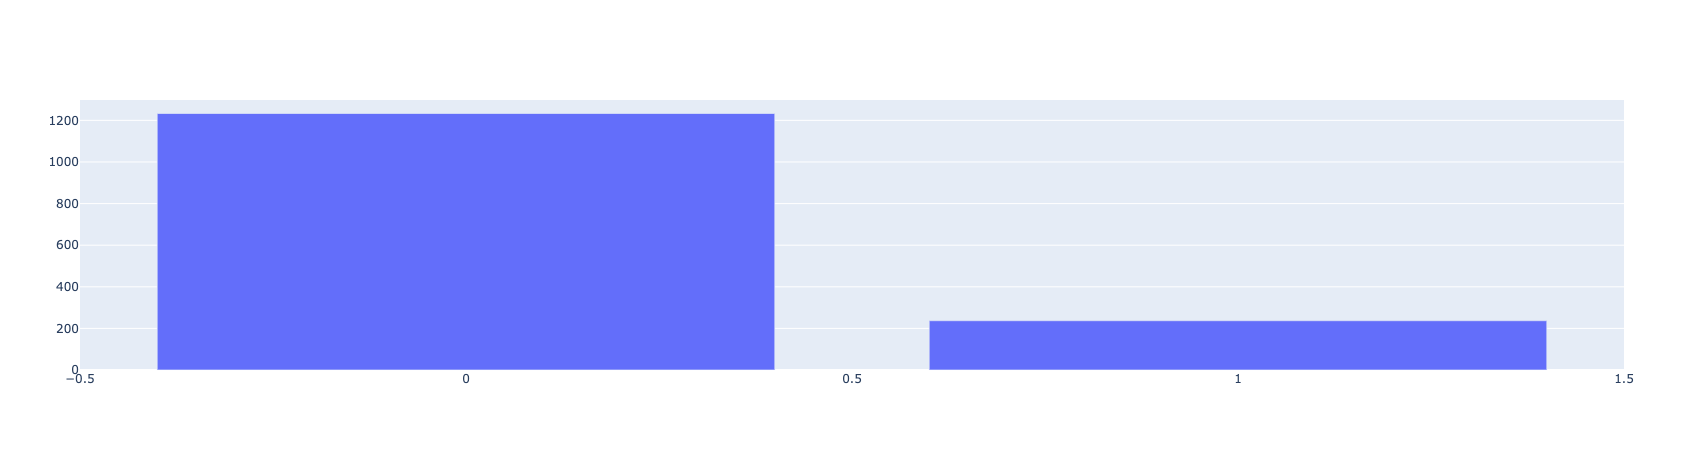

In [5]:
py.iplot([go.Bar(x=data.Attrition.value_counts().index,
                 y=data.Attrition.value_counts())])

### Pairplot

In [6]:
num_cols = [c for c in data.columns[data.dtypes != object] if c != "Attrition"]
print(len(num_cols))

23


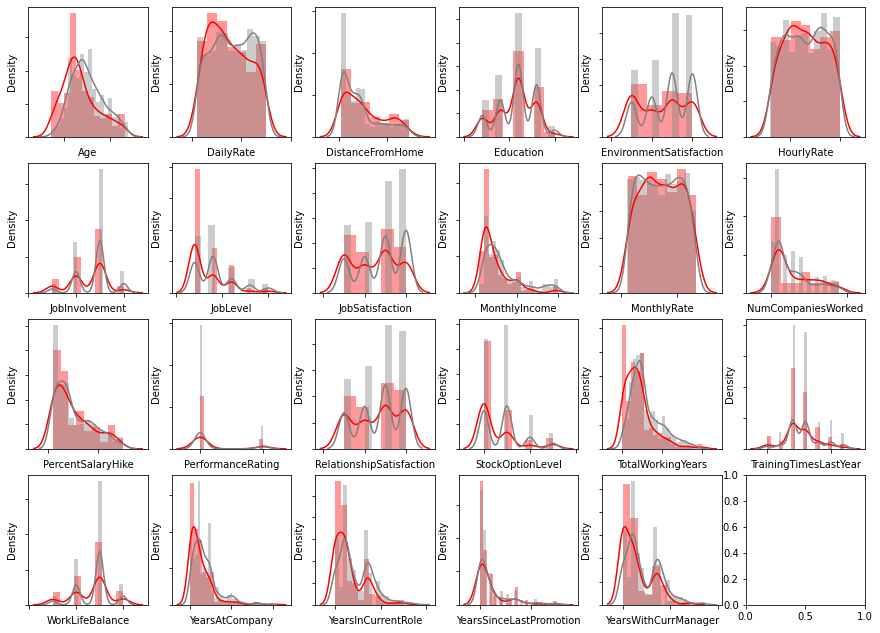

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

g_attrition = {1: "red", 0: "grey"}
f, axes = plt.subplots(4, 6, figsize=(15,11))
i, j = 0, 0
for c in num_cols:
    for g in g_attrition:
        s = sns.distplot(data[data.Attrition == g][c],
                         color=g_attrition[g],
                         ax = axes[i, j],
                         axlabel=None)
        s.set(xticklabels=[])
        s.set(yticklabels=[])
    if j % 6 != 5: j += 1
    else: j, i = 0, i+1
    
plt.show()

### Correlation Heatmap

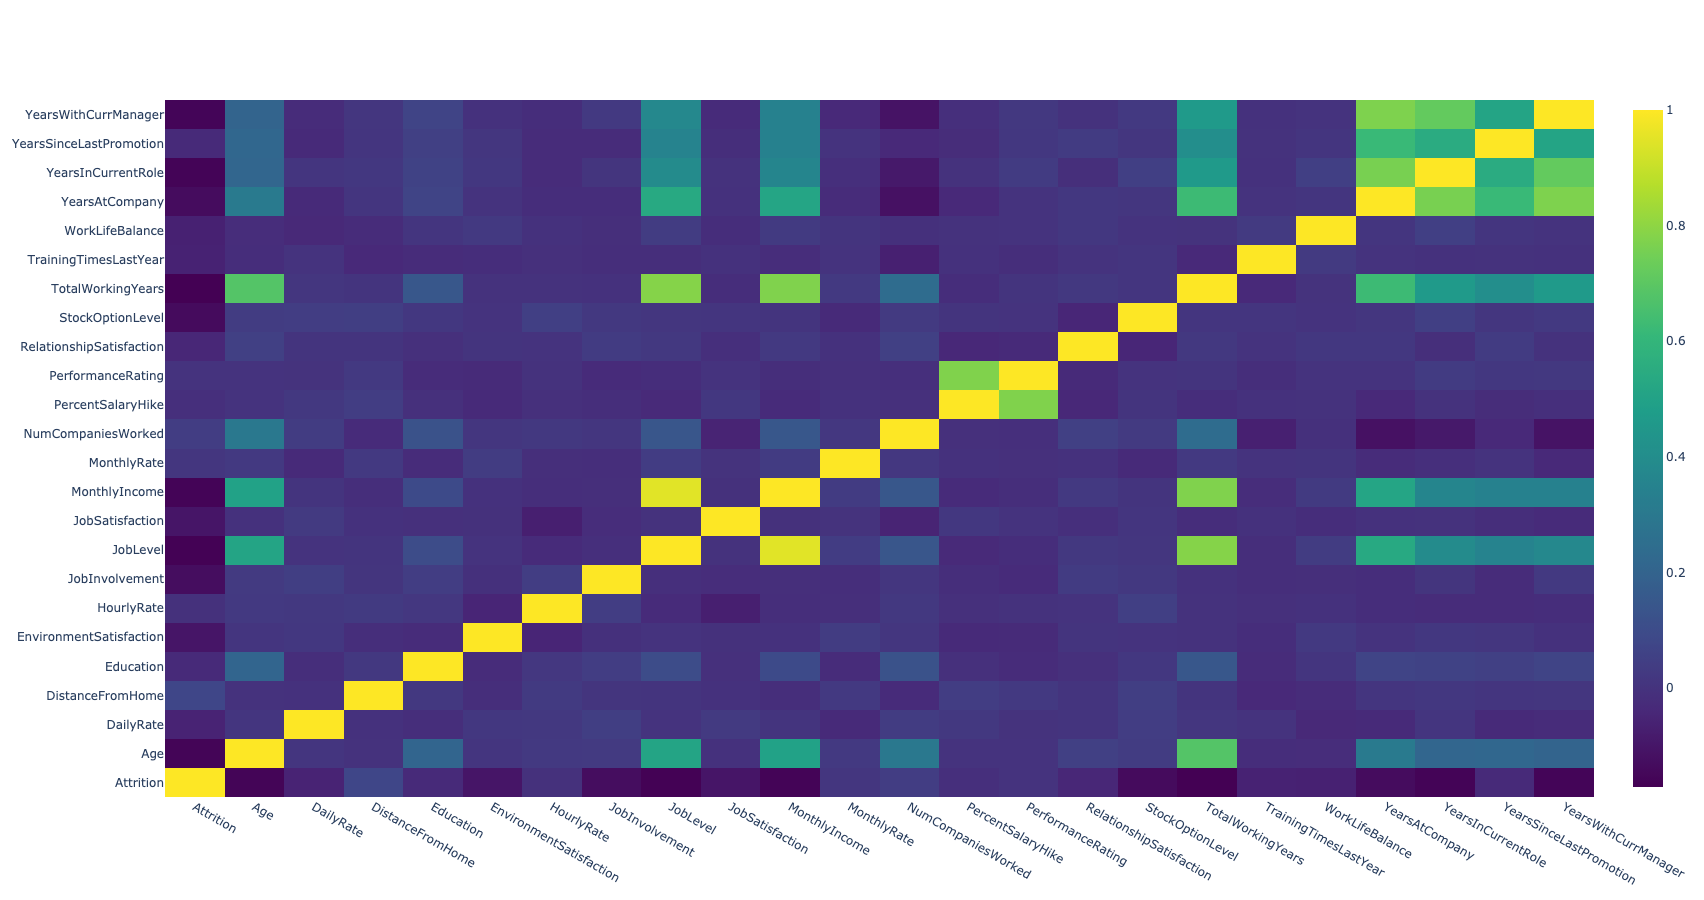

In [8]:
# Numerical Variables Only
data_num = data[data.columns[data.dtypes != object]]
hmap_data = [go.Heatmap(
        x = data_num.columns,
        y = data_num.columns,
        z = data_num.corr().values,
        colorscale="Viridis",
        reversescale=False,
        opacity=1.0,
    )]

hmap_layout = go.Layout(
        xaxis = dict(ticks="", nticks=len(data_num.columns)),
        yaxis = dict(ticks="", nticks=len(data_num.columns)),
        width=900, height=900,
    )

fig = go.Figure(data=hmap_data, layout=hmap_layout)
py.iplot(fig)

## 2. Feature Engineering

### Creating Dummy Variables

In [9]:
data = pd.get_dummies(data, columns=data.columns[data.dtypes == object], drop_first=True)
data

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,0,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,0,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,0,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


## 3. Linear Models

In [12]:
import statsmodels.api as sm

### Linear Probability Model

In [13]:
X = data.drop(columns="Attrition")
y = data.Attrition

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              Attrition   R-squared (uncentered):                   0.373
Model:                            OLS   Adj. R-squared (uncentered):              0.354
Method:                 Least Squares   F-statistic:                              19.29
Date:                Wed, 02 Dec 2020   Prob (F-statistic):                   6.24e-114
Time:                        09:46:51   Log-Likelihood:                         -401.32
No. Observations:                1470   AIC:                                      890.6
Df Residuals:                    1426   BIC:                                      1124.
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

### Logistic Regression

In [14]:
X = data.drop(columns="Attrition")
y = data.Attrition

model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.292242
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1426
Method:                           MLE   Df Model:                           43
Date:                Wed, 02 Dec 2020   Pseudo R-squ.:                  0.3384
Time:                        09:46:56   Log-Likelihood:                -429.60
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.912e-67
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0312      0.014     -2

## 4. ML Models

### Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="Attrition"),
                                                    data.Attrition,
                                                    test_size= 0.3,
                                                    random_state=1234);

In [17]:
print("Train:", len(X_train))
print("Test:",  len(X_test))

Train: 1029
Test: 441


### 1) Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=10000, solver="liblinear", random_state=1234)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[361  10]
 [ 47  23]]
0.8707482993197279


In [20]:
model_lr.coef_[0]

array([-1.52754140e-02, -1.91091570e-04,  4.13415491e-02,  4.84761416e-02,
       -3.61574747e-01, -3.05704450e-03, -4.07576383e-01,  3.61001822e-02,
       -2.82384886e-01, -1.07796316e-04,  1.89212951e-05,  1.91601439e-01,
       -5.62985230e-02,  6.59726644e-01, -2.03219570e-01, -2.89401270e-01,
       -6.10637884e-02, -7.01967735e-02, -1.18203432e-01,  1.38811951e-01,
       -1.72727163e-01,  1.43121230e-01, -1.31286306e-01,  6.93794440e-01,
        1.69841675e-01, -6.89293835e-02,  2.93666522e-01, -2.10739755e-01,
        2.38346251e-01, -3.29907134e-01,  7.89782506e-02,  3.39910296e-01,
        3.84464289e-01,  1.10293534e-01,  6.04828984e-01, -1.68914914e-02,
       -1.50338131e-01, -5.62642602e-02, -1.89735393e-01, -1.53602816e-02,
        3.06870995e-01,  9.61514171e-02,  6.02162136e-01,  1.62003743e+00])

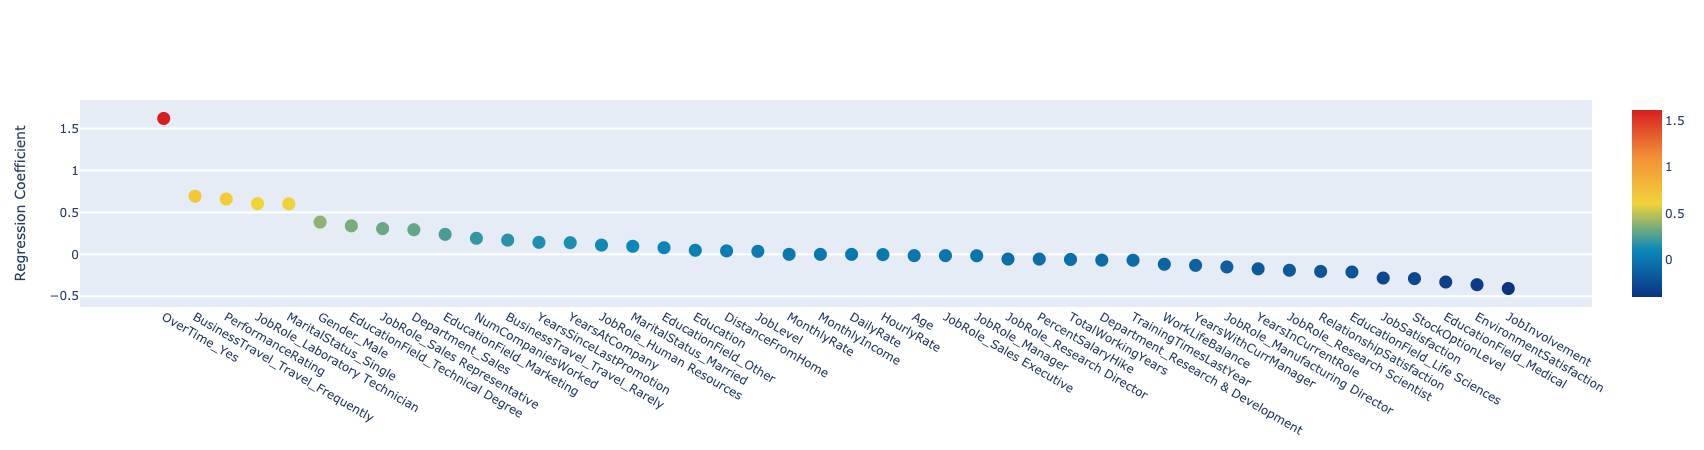

In [21]:
df_fi = pd.DataFrame({"variable":X_train.columns,
                      "score": model_lr.coef_[0]})
df_fi = df_fi.sort_values(by="score", ascending=False).reset_index(drop=True)

fi_data = [go.Scatter(
    y = df_fi.score,
    x = df_fi.variable,
    mode="markers",
    marker=dict(
        sizemode="diameter", sizeref=1, size=13,
        color = df_fi.score, colorscale="Portland",
        showscale=True),
    text = df_fi.variable)]

fi_layout= go.Layout(
    autosize=True,
    hovermode="closest",
    xaxis = dict(
         ticklen=5,
         showgrid=False, zeroline=False, showline=False),
    yaxis = dict(
        title = "Regression Coefficient",
        ticklen=5,
        gridwidth=2),
    showlegend=False)

fig = go.Figure(data=fi_data, layout=fi_layout)
py.iplot(fig)

### 2) Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=1234)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[323  48]
 [ 41  29]]
0.7981859410430839


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'criterion': ["gini", "entropy"],
    'max_depth': [4,5,6,7,8,9,10,11],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state' : [1234],
}

model_dt_bef = DecisionTreeClassifier()
CV_dt = GridSearchCV(estimator=model_dt_bef, param_grid=param_grid, cv=5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [1234]})

In [24]:
params = CV_dt.best_params_
params

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'random_state': 1234}

In [25]:
model_dt = DecisionTreeClassifier(**params)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[354  17]
 [ 58  12]]
0.8299319727891157


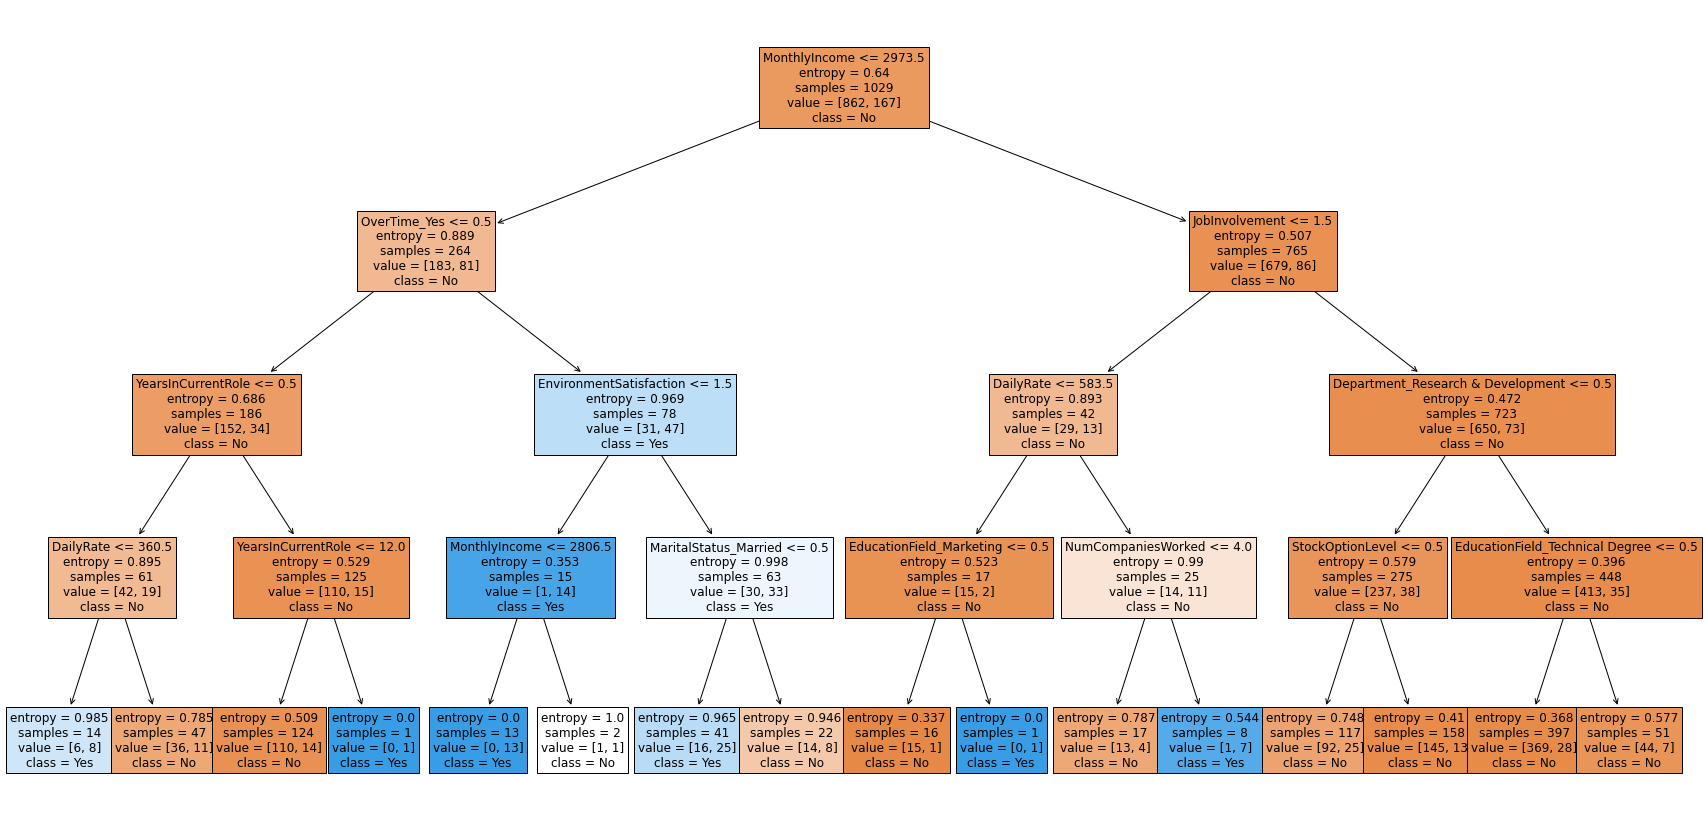

In [26]:
from sklearn import tree
#fig, axes = plt.subplots(1, 1, figsize=(30,15), dpi=1000)
fig, axes = plt.subplots(1, 1, figsize=(30,15))
cn = ["No","Yes"]
tree.plot_tree(model_dt, feature_names=X_train.columns, class_names=cn,
               filled=True, fontsize=12);
fig.savefig("tree_example.png")

In [27]:
model_dt.feature_importances_

array([0.        , 0.05918569, 0.        , 0.        , 0.05653466,
       0.        , 0.07007932, 0.        , 0.        , 0.29584281,
       0.        , 0.0534231 , 0.        , 0.        , 0.        ,
       0.0531742 , 0.        , 0.        , 0.        , 0.        ,
       0.07598093, 0.        , 0.        , 0.        , 0.        ,
       0.03616647, 0.        , 0.        , 0.02657329, 0.        ,
       0.        , 0.01310486, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01927461, 0.        , 0.24066005])

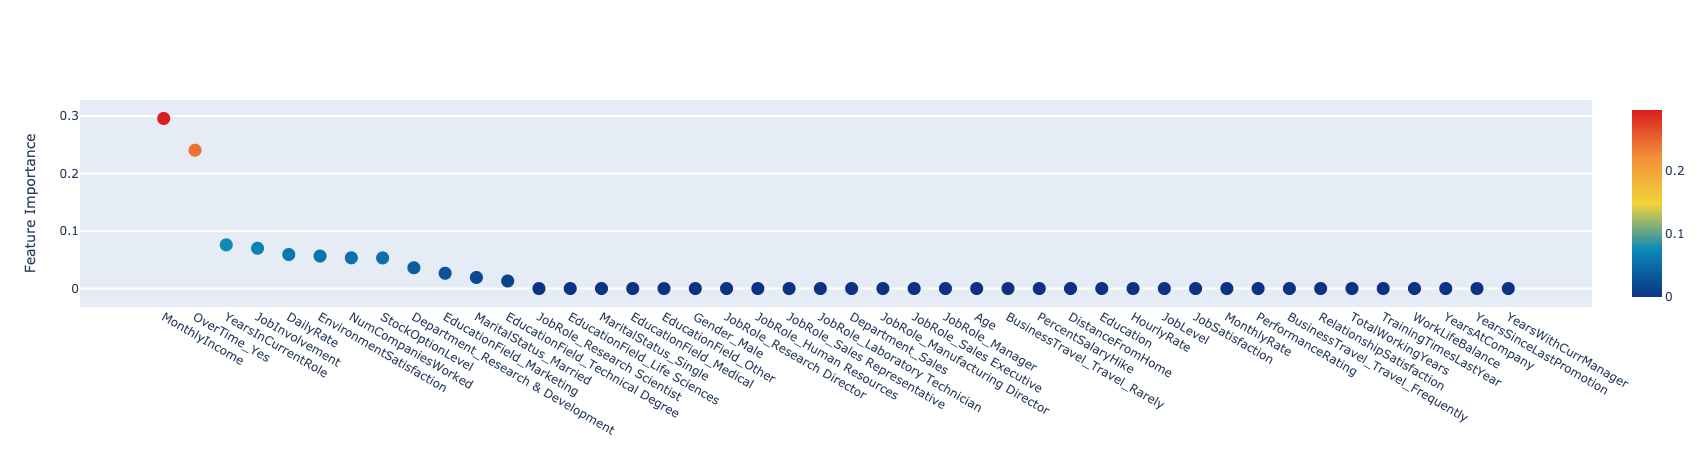

In [28]:
df_fi = pd.DataFrame({"variable":X_train.columns,
                      "score": model_dt.feature_importances_})
df_fi = df_fi.sort_values(by="score", ascending=False).reset_index(drop=True)

fi_data = [go.Scatter(
    y = df_fi.score,
    x = df_fi.variable,
    mode="markers",
    marker=dict(
        sizemode="diameter", sizeref=1, size=13,
        color = df_fi.score, colorscale="Portland",
        showscale=True),
    text = df_fi.variable)]

fi_layout= go.Layout(
    autosize=True,
    hovermode="closest",
    xaxis = dict(
         ticklen=5,
         showgrid=False, zeroline=False, showline=False),
    yaxis = dict(
        title = "Feature Importance",
        ticklen=5,
        gridwidth=2),
    showlegend=False)

fig = go.Figure(data=fi_data, layout=fi_layout)
py.iplot(fig)

### Partial Dependence Plot (PDP)

In [29]:
from sklearn.inspection import plot_partial_dependence

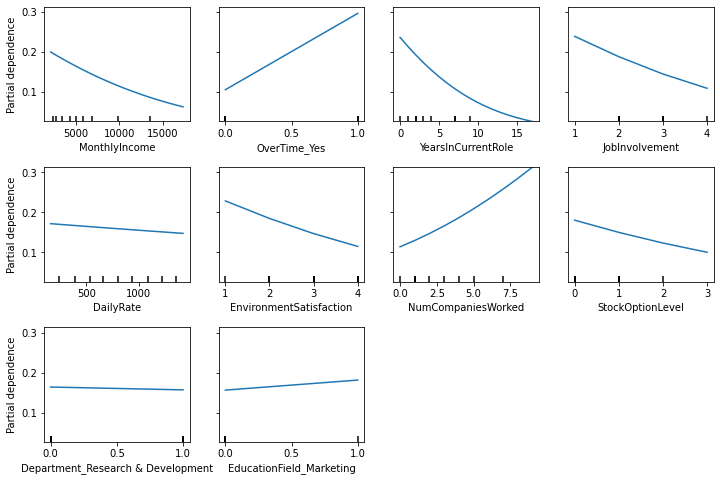

In [30]:
features = df_fi.variable[:10]
plt.rcParams["figure.figsize"] = (12,8)
display = plot_partial_dependence(model_lr, X_train, features, n_cols=4)
display.figure_.subplots_adjust(hspace=0.4)

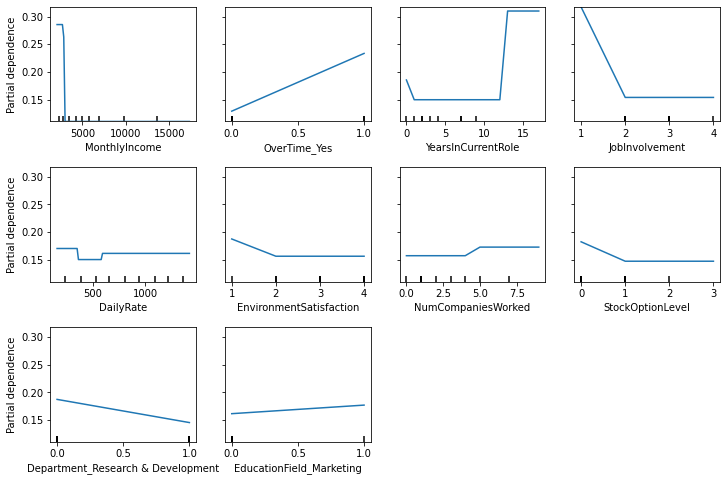

In [31]:
features = df_fi.variable[:10]
plt.rcParams["figure.figsize"] = (12,8)
display = plot_partial_dependence(model_dt, X_train, features, n_cols=4)
display.figure_.subplots_adjust(hspace=0.4)

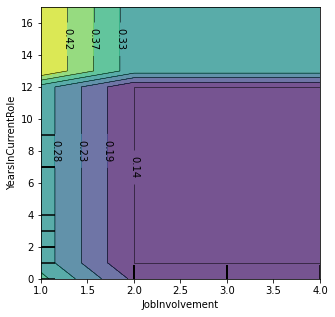

In [32]:
features = [("JobInvolvement", "YearsInCurrentRole")]
plt.rcParams["figure.figsize"] = (5,5)
plot_partial_dependence(model_dt, X_train, features)
#display.figure_.subplots_adjust(hspace=0.4)

### Additional Feature Engineering

In [33]:
X_train["MonthlyIncome_L"] = X_train.MonthlyIncome.apply(lambda x: 1 if x < 2400 else 0)
X_test["MonthlyIncome_L"] = X_test.MonthlyIncome.apply(lambda x: 1 if x < 2400 else 0)

X_train["YearsInCurrentRole_H"] = X_train.YearsInCurrentRole.apply(lambda x: 1 if x > 13 else 0)
X_test["YearsInCurrentRole_H"] = X_test.YearsInCurrentRole.apply(lambda x: 1 if x > 13 else 0)

In [34]:
# before
model_lr = LogisticRegression(max_iter=10000, solver="liblinear", random_state=1234)
model_lr.fit(X_train.drop(columns=["MonthlyIncome_L", "YearsInCurrentRole_H"]), y_train)
y_pred = model_lr.predict(X_test.drop(columns=["MonthlyIncome_L", "YearsInCurrentRole_H"]))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[361  10]
 [ 47  23]]
0.8707482993197279


In [35]:
# after
model_lr = LogisticRegression(max_iter=10000, solver="liblinear", random_state=1234)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[362   9]
 [ 46  24]]
0.8752834467120182


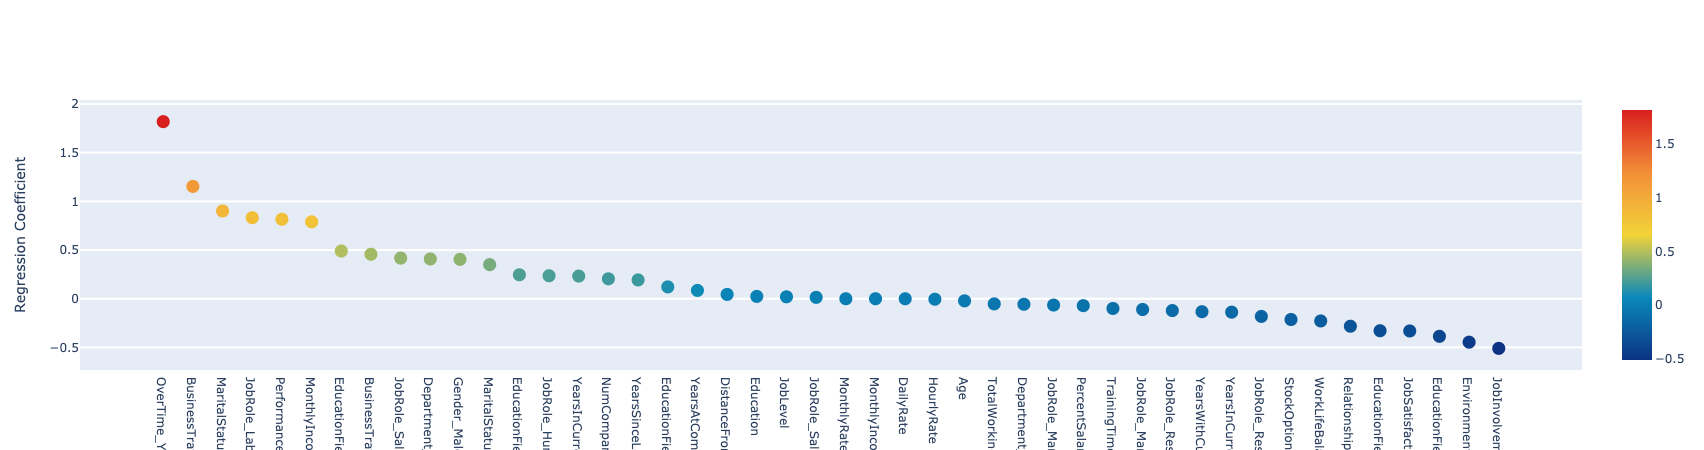

In [41]:
df_fi = pd.DataFrame({"variable":X_train.columns,
                      "score": model_lr.coef_[0]})
df_fi = df_fi.sort_values(by="score", ascending=False).reset_index(drop=True)

fi_data = [go.Scatter(
    y = df_fi.score,
    x = df_fi.variable,
    mode="markers",
    marker=dict(
        sizemode="diameter", sizeref=1, size=13,
        color = df_fi.score, colorscale="Portland",
        showscale=True),
    text = df_fi.variable)]

fi_layout= go.Layout(
    autosize=True,
    hovermode="closest",
    xaxis = dict(
         ticklen=5,
         showgrid=False, zeroline=False, showline=False),
    yaxis = dict(
        title = "Regression Coefficient",
        ticklen=5,
        gridwidth=2),
    showlegend=False)

fig = go.Figure(data=fi_data, layout=fi_layout)
py.iplot(fig)